## Exploring BraTS dataset

In [1]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [28]:
brats_data_path = f'{os.getcwd()}/BraTS2021/BraTS2021_00621/'
brats_list = os.listdir(brats_data_path)

def load_data(path):
    folder = os.listdir(path)
    raw_images = []
    raw_seg = None
    
    for img in folder:
        if 'seg' in img:
            raw_seg = nib.load(os.path.join(path, img)).get_fdata()
        else:
            raw_images.append(nib.load(os.path.join(path, img)).get_fdata())
    
    return raw_images, raw_seg

raw_images, raw_seg = load_data(brats_data_path)

print(f"Number of raw images: {len(raw_images)}")
print(f"Segmentation image shape: {raw_seg.shape}")

Number of raw images: 4
Segmentation image shape: (240, 240, 155)


In [29]:
t1,t1ce,t2,flair = raw_images

In [46]:
slice_index = 50

color_segmentation = np.zeros((240,240,3))
gray_segmentation = raw_seg[:,:,slice_index]
color_segmentation[gray_segmentation == 1] = [255,0,0] # Red (necrotic tumor core)
color_segmentation[gray_segmentation == 2] = [0,255,0] # Green (peritumoral edematous/invaded tissue)
color_segmentation[gray_segmentation == 4] = [0,0,255] # Blue (enhancing tumor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


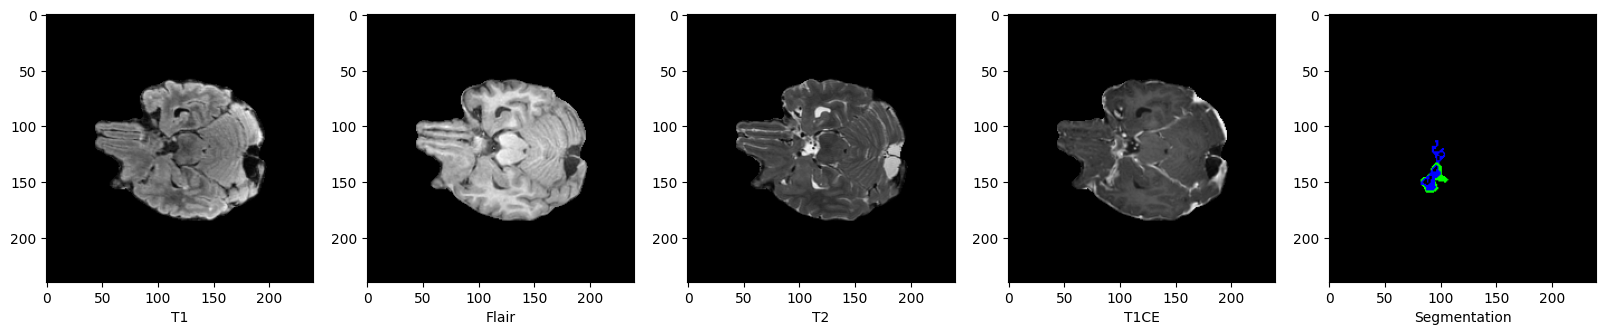

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.imshow(t1[:,:,slice_index],cmap='gray')
plt.xlabel('T1')
plt.subplot(1,5,2)
plt.imshow(flair[:,:,slice_index],cmap='gray')
plt.xlabel('Flair')
plt.subplot(1,5,3)
plt.imshow(t2[:,:,slice_index],cmap='gray')
plt.xlabel('T2')
plt.subplot(1,5,4)
plt.imshow(t1ce[:,:,slice_index],cmap='gray')
plt.xlabel('T1CE')
plt.subplot(1,5,5)
plt.imshow(color_segmentation,cmap='gray')
plt.xlabel('Segmentation')
plt.show()